In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms

# Implementation of the Perceptron Algorithm

In [2]:
def perceptron(X, y, num_iter, origin = False):
    '''''
    input: 
    - X (numpy array): feature matrix 
    - y (numpy array): label vector 
    - num_iter: number of iterations 
    - origin: controls whether resulting decision boundary should pass through origin or not

    output:
    - theta: parameters of decision boundary
    '''''
    
    # Get dimensions of X matrix
    num_ex = X.shape[0]
    num_feat = X.shape[1]
        
    # Append vector of ones to the left of X matrix (only if decision boundary does not pass through the origin)
    if not origin:
        X = np.c_[np.ones((num_ex, 1)), X]

    # Initialize theta vector
    if origin:
        theta = np.zeros(num_feat)
        theta_new = np.zeros(num_feat)
    else:
        theta = np.zeros(num_feat + 1)
        theta_new = np.zeros(num_feat + 1)

    # Run perceptron algorithm
    for t in range(num_iter):
        # Initialize plot for every iteration (only when there are exactly 2 features)
        fig, ax = plt.subplots()
        cmap = {1: "blue", -1: "red"}
        for i in range(X.shape[0]):
            if origin:
                ax.scatter(X[i, 0], X[i, 1], c = cmap[y[i]])
            else:
                ax.scatter(X[i, 1], X[i, 2], c = cmap[y[i]])        
        
        # Implement update rule
        for i in range(num_ex):
            if y[i] * (theta @ X[i, :]) <= 0:
                theta_new += y[i] * X[i, :]
                                        
        # Plot decision boundary (only when there are exactly 2 features)
        x_vals = np.arange(np.min(X[:, 1]), np.max(X[:, 1]) + 1, 0.25)
        if not origin:
            if theta[2] != 0:
                y_vals = [-(theta[0] + theta[1] * i) / theta[2] for i in x_vals]
                ax.plot(x_vals, y_vals, 'b')
            else:
                plt.axvline(x = -theta[0] / theta[1])
        else:
            if theta[1] != 0:
                y_vals = [-(theta[0] * i) / theta[1] for i in x_vals]
                ax.plot(x_vals, y_vals, 'b')
            else:
                plt.axvline(x = 0)        
        ax.set_title("Output for Iteration " + str(t + 1))
        
        # Break if algorithm has converged
        if np.array_equal(theta, theta_new):
            break
        theta = theta_new
                        
    return theta

C:\Users\JM\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


array([2., 0., 2.])

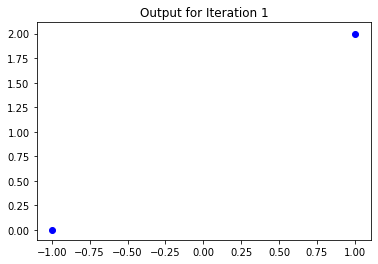

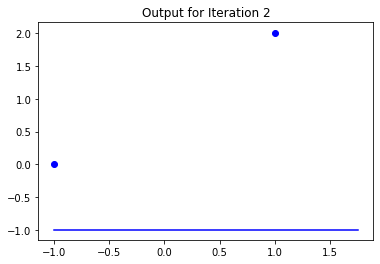

In [3]:
feature_matrix = np.array([[1, 2], [-1, 0]])
labels = np.array([1, 1])
T = 2

perceptron(feature_matrix, labels, T, origin = False)

array([-3. ,  0.5])

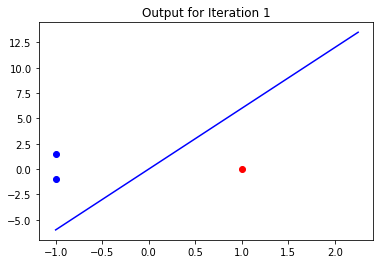

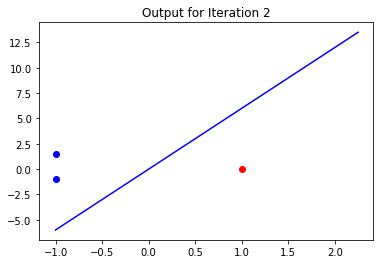

In [3]:
X_ex = np.array([[-1, -1], [1, 0], [-1, 1.5]])
y_ex = np.array([1, -1, 1])

perceptron(X_ex, y_ex, 20, origin = True)

# Homework 1

## PROBLEM 1: Perceptron Mistakes

For this problem, we will be implementing a modified variant of the perceptron algorithm (through the origin). In this case, the algorithm will cycle through the data (in order) until such time that the algorithm makes no further mistakes. 

In [4]:
def perceptron_modified(X, y, origin = False):
    '''''
    input: 
    - X (numpy array): feature matrix 
    - y (numpy array): label vector 
    - origin: controls whether resulting decision boundary should pass through origin or not

    output:
    - theta: parameters of decision boundary
    '''''
    
    # Get dimensions of X matrix
    num_ex = X.shape[0]
    num_feat = X.shape[1]
        
    # Append vector of ones to the left of X matrix (only if decision boundary does not pass through the origin)
    if not origin:
        X = np.c_[np.ones((num_ex, 1)), X]

    # Initialize theta vector
    if origin:
        theta = np.zeros(num_feat)
    else:
        theta = np.zeros(num_feat + 1)
        
    # Initialize mistakes
    mistakes = np.ones(num_ex)

    # Run perceptron algorithm
    t = 0
    while True:        
        # Implement update rule
        for i in range(num_ex):
            if y[i] * (theta @ X[i, :]) <= 0:
                theta += y[i] * X[i, :]
                print(theta)
                
                # Initialize plot for every iteration (only when there are exactly 2 features)
                fig, ax = plt.subplots()
                cmap = {1: "blue", -1: "red"}
                for i in range(X.shape[0]):
                    if origin:
                        ax.scatter(X[i, 0], X[i, 1], c = cmap[y[i]])
                    else:
                        ax.scatter(X[i, 1], X[i, 2], c = cmap[y[i]])
                        
                # Plot decision boundary (only when there are exactly 2 features)
                x_vals = np.arange(np.min(X[:, 1]), np.max(X[:, 1]) + 1, 0.25)
                if not origin:
                    if theta[2] != 0:
                        y_vals = [-(theta[0] + theta[1] * i) / theta[2] for i in x_vals]
                        ax.plot(x_vals, y_vals, 'b')
                    else:
                        plt.axvline(x = -theta[0] / theta[1])
                else:
                    if theta[1] != 0:
                        y_vals = [-(theta[0] * i) / theta[1] for i in x_vals]
                        ax.plot(x_vals, y_vals, 'b')
                    else:
                        plt.axvline(x = 0)        
                ax.set_title("Output for Iteration " + str(t + 1)) 
                
                # Iteration finished
                t += 1
            else:
                mistakes[i] = 0        
        
        # Break if no more mistakes
        if not np.any(mistakes):
            break
                                
    return theta

[-1. -1.]
[-2.   0.5]


array([-2. ,  0.5])

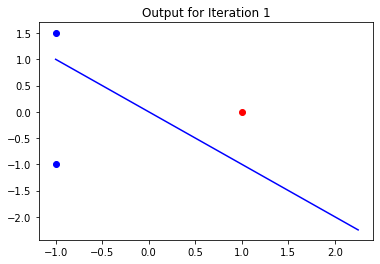

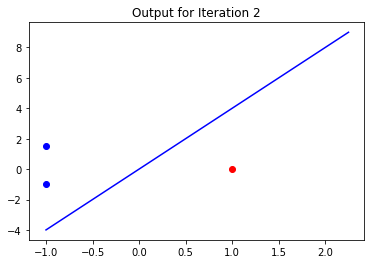

In [5]:
# Starting with the data point (-1, -1)
X_ex = np.array([[-1, -1], [1, 0], [-1, 1.5]])
y_ex = np.array([1, -1, 1])

perceptron_modified(X_ex, y_ex, origin = True)

[-1.  0.]


array([-1.,  0.])

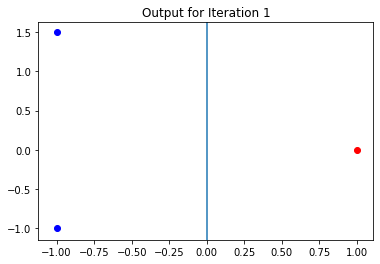

In [6]:
# Starting with the data point (1, 0)
X_ex = np.array([[1, 0], [-1, 1.5], [-1, -1]])
y_ex = np.array([-1, 1, 1])

perceptron_modified(X_ex, y_ex, origin = True)

Clearly, for this modified perceptron algorithm, the <b> iteration order </b> affects the number of mistakes made by the algorithm.

Now we change the third data point to be (-1, 10).

[-1. -1.]
[-2.  9.]
[-3.  8.]
[-4.  7.]
[-5.  6.]
[-6.  5.]


array([-6.,  5.])

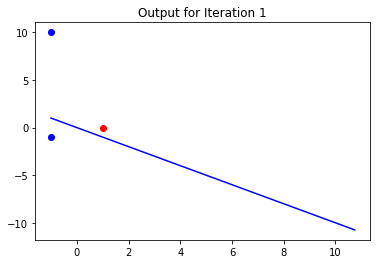

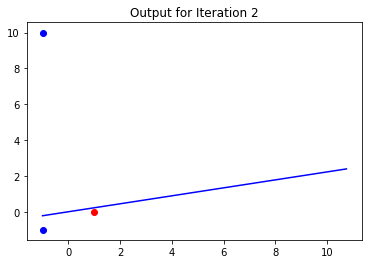

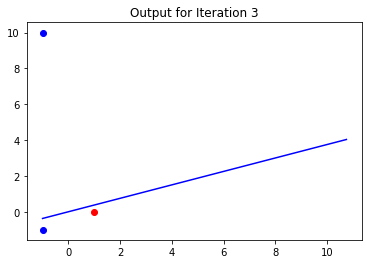

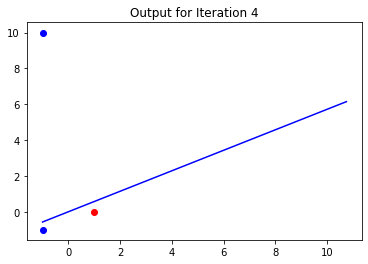

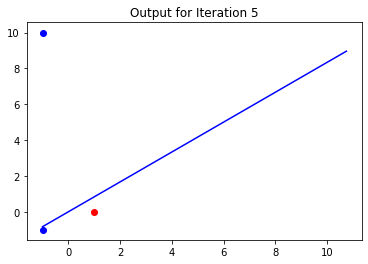

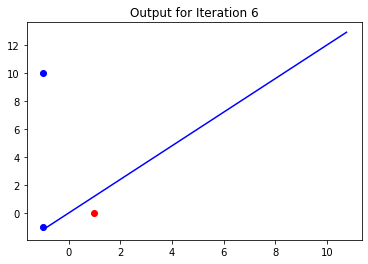

In [7]:
# Starting with the data point (-1, -1)
X_ex = np.array([[-1, -1], [1, 0], [-1, 10]])
y_ex = np.array([1, -1, 1])

perceptron_modified(X_ex, y_ex, origin = True)

[-1.  0.]


array([-1.,  0.])

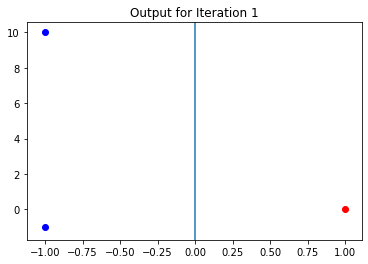

In [8]:
# Starting with the data point (1, 0)
X_ex = np.array([[1, 0], [-1, 10], [-1, -1]])
y_ex = np.array([-1, 1, 1])

perceptron_modified(X_ex, y_ex, origin = True)

In this case, the <b> maximum norm of data points </b> affects the number of mistakes made by the modified perceptron algorithm.

## PROBLEM 2: Perceptron Performance

For this problem, we modify `perceptron_modified` to count the number of mistakes made per data point during a run of the modified perceptron algorithm. We also allow for the initialization of `theta`.

In [12]:
def perceptron_modified(X, y, theta = None, origin = False):
    '''''
    input: 
    - X (numpy array): feature matrix 
    - y (numpy array): label vector 
    - theta (numpy array): parameters of decision boundary 
    - origin: controls whether resulting decision boundary should pass through origin or not

    output:
    - theta: parameters of decision boundary
    '''''
    
    # Get dimensions of X matrix
    num_ex = X.shape[0]
    num_feat = X.shape[1]
        
    # Append vector of ones to the left of X matrix (only if decision boundary does not pass through the origin)
    if not origin:
        X = np.c_[np.ones((num_ex, 1)), X]

    # Initialize theta vector
    if theta is None:        
        if origin:
           theta = np.zeros(num_feat)
        else:
           theta = np.zeros(num_feat + 1)
        
    # Initialize mistakes
    mistakes = np.ones(num_ex)
    mistakes_total = np.zeros(num_ex)

    # Run perceptron algorithm
    t = 0
    while True:        
        # Implement update rule
        for i in range(num_ex):
            if y[i] * (theta @ X[i, :]) <= 0:
                theta += y[i] * X[i, :]
                print("theta: ", theta)
                
                # Initialize plot for every iteration (only when there are exactly 2 features)
                fig, ax = plt.subplots()
                cmap = {1: "blue", -1: "red"}
                for i in range(X.shape[0]):
                    if origin:
                        ax.scatter(X[i, 0], X[i, 1], c = cmap[y[i]])
                    else:
                        ax.scatter(X[i, 1], X[i, 2], c = cmap[y[i]])
                        
                # Plot decision boundary (only when there are exactly 2 features)
                x_vals = np.arange(np.min(X[:, 1]), np.max(X[:, 1]) + 1, 0.25)
                if not origin:
                    if theta[2] != 0:
                        y_vals = [-(theta[0] + theta[1] * i) / theta[2] for i in x_vals]
                        ax.plot(x_vals, y_vals, 'b')
                    else:
                        plt.axvline(x = -theta[0] / theta[1])
                else:
                    if theta[1] != 0:
                        y_vals = [-(theta[0] * i) / theta[1] for i in x_vals]
                        ax.plot(x_vals, y_vals, 'b')
                    else:
                        plt.axvline(x = 0)        
                ax.set_title("Output for Iteration " + str(t + 1)) 
                
                # Iteration finished
                t += 1
            else:
                mistakes[i] = 0        
        
        # Get cumulative mistakes
        mistakes_total += mistakes
        print("mistakes_total: ", mistakes_total)
        print("-------------")
        
        # Break if no more mistakes
        if not np.any(mistakes):
            break
                                
    return theta

theta:  [ 1. -4.  2.]
theta:  [ 0. -3.  3.]
theta:  [-1. -5.  1.]
mistakes_total:  [1. 0. 1. 1. 0.]
-------------
theta:  [-2. -4.  2.]
mistakes_total:  [1. 0. 2. 1. 0.]
-------------
theta:  [-3. -3.  3.]
mistakes_total:  [1. 0. 3. 1. 0.]
-------------
mistakes_total:  [1. 0. 3. 1. 0.]
-------------


array([-3., -3.,  3.])

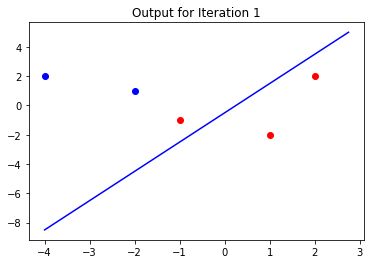

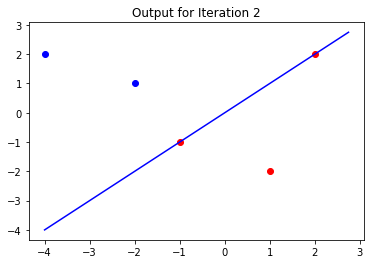

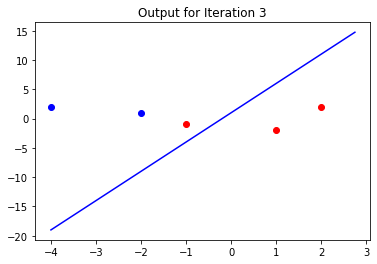

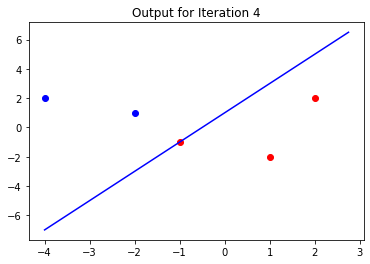

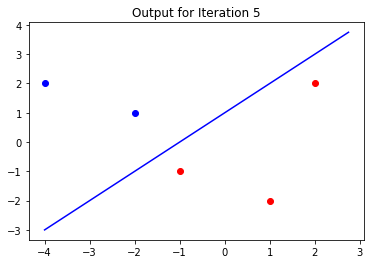

In [13]:
X_ex = np.array([[-4, 2], [-2, 1], [-1, -1], [2, 2], [1, -2]])
y_ex = np.array([1, 1, -1, -1, -1])

perceptron_modified(X_ex, y_ex, origin = False)

In [11]:
X_ex = np.array([[-4, 2], [-2, 1], [-1, -1], [2, 2], [1, -2]])
y_ex = np.array([1, 1, -1, -1, -1])

perceptron_modified(X_ex, y_ex, theta = np.array([-3, -3, 3]), origin = False)

mistakes_total:  [0. 0. 0. 0. 0.]
-------------


array([-3, -3,  3])

# Homework 2

## PROBLEM 3: Perceptron Update

In this problem, we consider a set of n = d labeled d-dimensional feature vectors $\{(x^{(t)}, y^{(t)}), t = 1, \ldots, d\}$ where the $x^{(t)}$'s are defined as follows:
$
\begin{equation}
x^{(t)} = 
\left\{
\begin{array}{ll}
      \cos(\pi t) & i = t \\
      0 & i \neq t \\
\end{array} 
\right.
\end{equation}
$

We use the no-offset `perceptron_modified` algorithm to determine a satisfactory linear classifier.  

In the case of $n = 2$,

theta:  [-1.  0.]
theta:  [-1.  1.]
mistakes_total:  [1. 1.]
-------------
mistakes_total:  [1. 1.]
-------------


array([-1.,  1.])

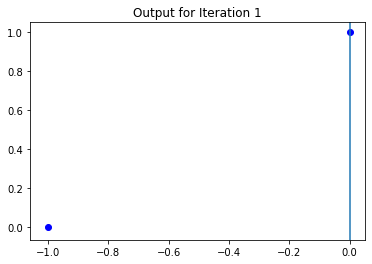

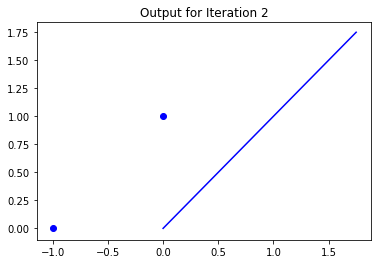

In [23]:
# Generate X_ex
X_ex = np.zeros((2, 2))
for i in range(1, 3):
    for t in range(1, 3):
        if i == t:
            X_ex[i - 1, t - 1] = np.cos(np.pi * t)
        else:
            X_ex[i - 1, t - 1] = 0

y_ex = np.array([1, 1])

perceptron_modified(X_ex, y_ex, origin = True)

The algorithm updates after 2 iterations. We test for other values of $d$ to make a general conclusion.

In [39]:
def perceptron_update(n, y, origin = True):
    '''''
    input: 
    - n (numpy array): feature matrix 
    - y (numpy array): label vector 
    - origin: controls whether resulting decision boundary should pass through origin or not

    output:
    - theta: parameters of decision boundary
    '''''
    # Generate X
    X = np.zeros((n, n))
    for i in range(1, n + 1):
        for t in range(1, n + 1):
            if i == t:
                X[i - 1, t - 1] = np.cos(np.pi * t)
            else:
                X[i - 1, t - 1] = 0

    # Get dimensions of X matrix
    num_ex = X.shape[0]
    num_feat = X.shape[1]
        
    # Append vector of ones to the left of X matrix (only if decision boundary does not pass through the origin)
    if not origin:
        X = np.c_[np.ones((num_ex, 1)), X]

    # Initialize theta vector
    if origin:
        theta = np.zeros(num_feat)
    else:
        theta = np.zeros(num_feat + 1)
        
    # Initialize mistakes
    mistakes = np.ones(num_ex)

    # Run perceptron algorithm
    t = 0
    while True:        
        # Implement update rule
        for i in range(num_ex):
            if y[i] * (theta @ X[i, :]) <= 0:
                theta += y[i] * X[i, :]
                                
                # Iteration finished
                t += 1
            else:
                mistakes[i] = 0        
        
        # Break if no more mistakes
        if not np.any(mistakes):
            break
                                
    return t

# n = 10
print("n = 10")
print(perceptron_update(10, np.ones(10)))

# n = 100
print("n = 100")
print(perceptron_update(100, np.ones(100)))

# n = 1000
print("n = 1000")
print(perceptron_update(1000, np.ones(1000)))

n = 10
10
n = 100
100
n = 1000
1000


It seems that in general, `perceptron_update` will make <b> exactly d updates </b> to `theta`.

# Recitation: Tumor Diagnosis Demo

In [41]:
# Load dataset
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # Training labels ('malignant = 0', 'benign = 1')
X = cancer_data.data # 30 attributes; https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
X = preprocessing.scale(X) # scale each data attribute to zero-mean and unit variance 

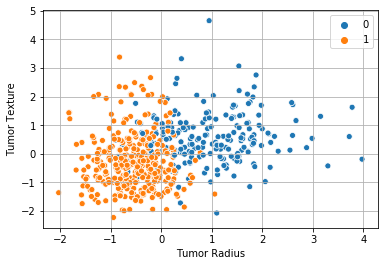

In [42]:
# Plot the first 2 attributes of training points
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [43]:
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # Initialize validation score for each alpha value

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores

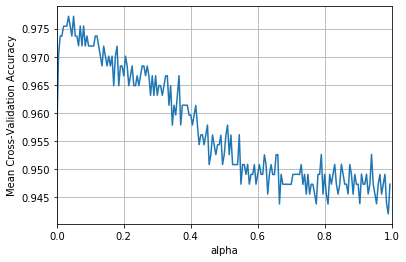

In [44]:
# Plot how cross-validation score changes with alpha
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.035000000000001


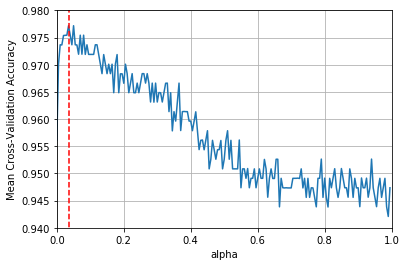

In [45]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [46]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X,y)
print('Training Accuracy =', model_trained.score(X,y))
# Training Accuracy = 0.9806678383128296

Training Accuracy = 0.9806678383128296


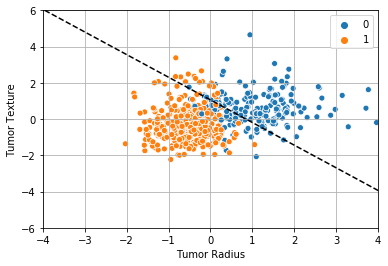

In [49]:
# Plot decision boundary of trained model
slope = -model_trained.coef_[0,1]/model_trained.coef_[0,0]
x1 = np.arange(-10,10,0.5)
y1 = slope*x1-model_trained.intercept_/model_trained.coef_[0, 1]
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.plot(x1,y1,'--k')
plt.xlim(-4,4)
plt.ylim(-6,6)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()